In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ramps = pd.read_csv('damgo_ramp.csv')
tbq_counts = pd.read_csv('../synblock_sim/ctrl_damgo_tbq_counts.csv')
tbq_ratios = pd.read_csv('../synblock_sim/ctrl_damgo_tbq_ratios.csv')

In [4]:
df = pd.concat([ramps,tbq_counts, tbq_ratios], axis=1)

In [75]:
df.index = df['run_seed']

In [76]:
df.columns

Index(['Unnamed: 0', 'run_seed', 'oprm1_T_oprm1_T', 'oprm1_T_oprm1_B',
       'oprm1_T_oprm1_Q', 'oprm1_B_oprm1_T', 'oprm1_B_oprm1_B',
       'oprm1_B_oprm1_Q', 'oprm1_Q_oprm1_T', 'oprm1_Q_oprm1_B',
       'oprm1_Q_oprm1_Q', 'exc_T_oprm1_T', 'exc_T_oprm1_B', 'exc_T_oprm1_Q',
       'exc_B_oprm1_T', 'exc_B_oprm1_B', 'exc_B_oprm1_Q', 'exc_Q_oprm1_T',
       'exc_Q_oprm1_B', 'exc_Q_oprm1_Q', 'inh_T_oprm1_T', 'inh_T_oprm1_B',
       'inh_T_oprm1_Q', 'inh_B_oprm1_T', 'inh_B_oprm1_B', 'inh_B_oprm1_Q',
       'inh_Q_oprm1_T', 'inh_Q_oprm1_B', 'inh_Q_oprm1_Q', 'oprm1_T_exc_T',
       'oprm1_T_exc_B', 'oprm1_T_exc_Q', 'oprm1_B_exc_T', 'oprm1_B_exc_B',
       'oprm1_B_exc_Q', 'oprm1_Q_exc_T', 'oprm1_Q_exc_B', 'oprm1_Q_exc_Q',
       'oprm1_T_inh_T', 'oprm1_T_inh_B', 'oprm1_T_inh_Q', 'oprm1_B_inh_T',
       'oprm1_B_inh_B', 'oprm1_B_inh_Q', 'oprm1_Q_inh_T', 'oprm1_Q_inh_B',
       'oprm1_Q_inh_Q', 'exc_T_exc_T', 'exc_T_exc_B', 'exc_T_exc_Q',
       'exc_B_exc_T', 'exc_B_exc_B', 'exc_B_exc_Q', 'ex

In [77]:
df = df.loc[:,'I_opioid_shutdown':]
df = df.drop('Unnamed: 0', axis=1)

In [78]:
df

,I_opioid_shutdown,LD50,E_E_connectivity,ctrl_t_count,ctrl_b_count,ctrl_q_count,damgo_t_count,damgo_b_count,damgo_q_count,ctrl_t_ratio,ctrl_b_ratio,ctrl_q_ratio,damgo_t_ratio,damgo_b_ratio,damgo_q_ratio
run_seed,,,,,,,,,,,,,,,
1,5.400000,3.650711,0.250892,119,15,166,59,10,231,0.396667,0.050000,0.553333,0.196667,0.033333,0.770000
2,5.060000,2.616641,0.054963,118,25,157,61,19,220,0.393333,0.083333,0.523333,0.203333,0.063333,0.733333
3,5.366667,3.854999,0.162036,118,21,161,58,18,224,0.393333,0.070000,0.536667,0.193333,0.060000,0.746667
4,4.793333,2.627077,0.156518,113,24,163,66,16,218,0.376667,0.080000,0.543333,0.220000,0.053333,0.726667
5,4.573333,3.178506,0.052165,122,21,157,67,12,221,0.406667,0.070000,0.523333,0.223333,0.040000,0.736667
6,6.340000,3.553710,0.186249,119,15,166,61,9,230,0.396667,0.050000,0.553333,0.203333,0.030000,0.766667
7,5.093333,3.204973,0.055703,118,24,158,66,16,218,0.393333,0.080000,0.526667,0.220000,0.053333,0.726667
8,4.433333,2.733570,0.051626,113,28,159,61,26,213,0.376667,0.093333,0.530000,0.203333,0.086667,0.710000
9,5.160000,2.197331,0.048327,117,17,166,68,9,223,0.390000,0.056667,0.553333,0.226667,0.030000,0.743333


In [79]:
np.mean(df['I_opioid_shutdown'])

5.260333333333334

In [5]:
def high_or_low_sensitivity(row, df):  
    if row['I_opioid_shutdown'] > np.median(df['I_opioid_shutdown']):
        return 'High Sensitivity'
    else:
        return 'Low Sensitivity'

In [6]:
df['sensitivity_class'] = df.apply(lambda row: high_or_low_sensitivity(row,df), axis=1)
df

,Unnamed: 0,run_seed,oprm1_T_oprm1_T,oprm1_T_oprm1_B,oprm1_T_oprm1_Q,oprm1_B_oprm1_T,oprm1_B_oprm1_B,oprm1_B_oprm1_Q,oprm1_Q_oprm1_T,oprm1_Q_oprm1_B,...,damgo_b_count,damgo_q_count,Unnamed: 0,ctrl_t_ratio,ctrl_b_ratio,ctrl_q_ratio,damgo_t_ratio,damgo_b_ratio,damgo_q_ratio,sensitivity_class
0,0,1,37,1,27,2,0,2,31,6,...,10,231,1,0.396667,0.050000,0.553333,0.196667,0.033333,0.770000,High Sensitivity
1,1,2,31,12,28,8,2,1,33,2,...,19,220,2,0.393333,0.083333,0.523333,0.203333,0.063333,0.733333,Low Sensitivity
2,2,3,43,1,45,3,1,2,37,5,...,18,224,3,0.393333,0.070000,0.536667,0.193333,0.060000,0.746667,High Sensitivity
3,3,4,25,3,22,4,1,9,38,6,...,16,218,4,0.376667,0.080000,0.543333,0.220000,0.053333,0.726667,Low Sensitivity
4,4,5,38,9,24,10,2,6,35,8,...,12,221,5,0.406667,0.070000,0.523333,0.223333,0.040000,0.736667,Low Sensitivity
5,5,6,38,3,30,5,0,8,39,2,...,9,230,6,0.396667,0.050000,0.553333,0.203333,0.030000,0.766667,High Sensitivity
6,6,7,20,10,26,4,1,5,30,2,...,16,218,7,0.393333,0.080000,0.526667,0.220000,0.053333,0.726667,Low Sensitivity
7,7,8,19,1,30,5,1,3,30,1,...,26,213,8,0.376667,0.093333,0.530000,0.203333,0.086667,0.710000,Low Sensitivity
8,8,9,39,3,29,5,0,6,32,4,...,9,223,9,0.390000,0.056667,0.553333,0.226667,0.030000,0.743333,Low Sensitivity
9,9,10,37,3,44,4,0,3,27,3,...,15,226,10,0.400000,0.063333,0.536667,0.196667,0.050000,0.753333,Low Sensitivity


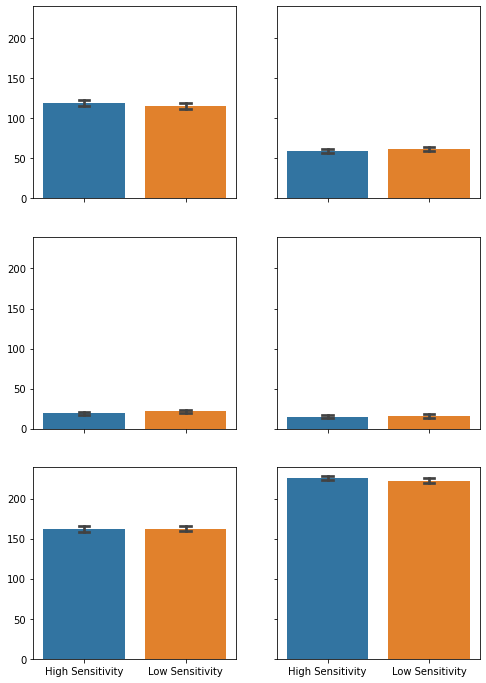

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(8,12), sharex=True, sharey=True)
sns.barplot(ax=axes[0,0], x='sensitivity_class', y='ctrl_t_count', data=df, capsize=.1)
sns.barplot(ax=axes[0,1], x='sensitivity_class', y='damgo_t_count', data=df, capsize=.1)
sns.barplot(ax=axes[1,0], x='sensitivity_class', y='ctrl_b_count', data=df, capsize=.1)
sns.barplot(ax=axes[1,1], x='sensitivity_class', y='damgo_b_count', data=df, capsize=.1)
sns.barplot(ax=axes[2,0], x='sensitivity_class', y='ctrl_q_count', data=df, capsize=.1)
sns.barplot(ax=axes[2,1], x='sensitivity_class', y='damgo_q_count', data=df, capsize=.1)
for i in range(3):
    for j in range(2):
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('')
        
plt.savefig('high_low_sensitivity_barplot.pdf')

In [83]:
axes[0][0]

<AxesSubplot:>